# Baseline model, LINE GO UP!

In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

#DiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

#SVMs
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from mpl_toolkits import mplot3d
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import(average_precision_score)
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
MSFT
The accuracy of the model is: 52.38 %
The f1 value for the model is: 68.75 %


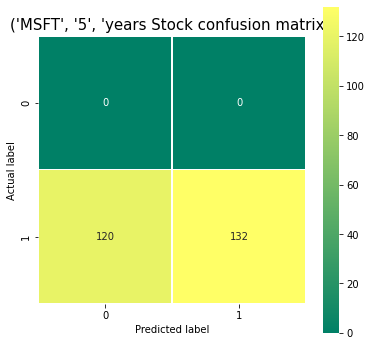

The accuracy of the model is: 56.26 %
The f1 value for the model is: 72.01 %


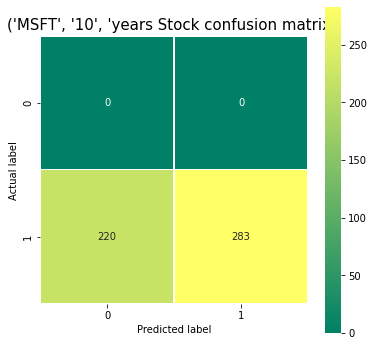

The accuracy of the model is: 52.78 %
The f1 value for the model is: 69.09 %


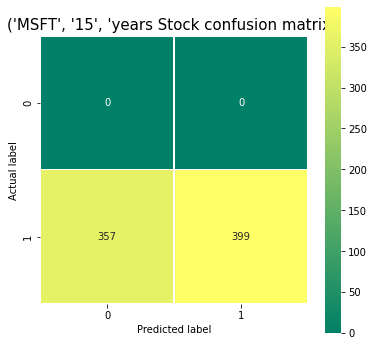

The accuracy of the model is: 51.24 %
The f1 value for the model is: 67.76 %


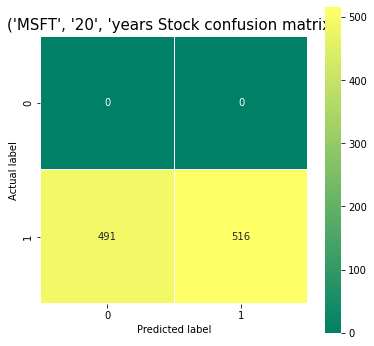

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
BP
The accuracy of the model is: 48.02 %
The f1 value for the model is: 64.88 %


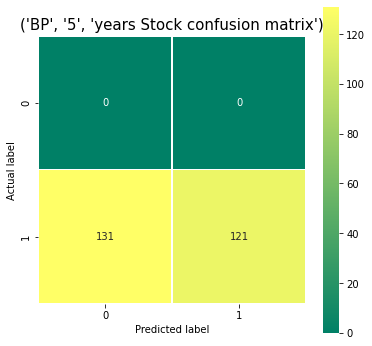

The accuracy of the model is: 52.09 %
The f1 value for the model is: 68.50 %


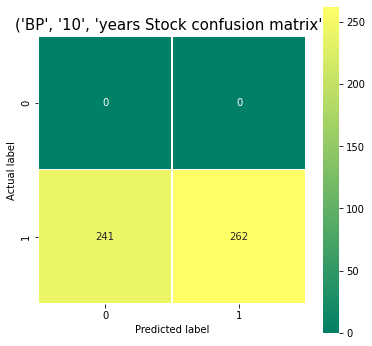

The accuracy of the model is: 49.07 %
The f1 value for the model is: 65.84 %


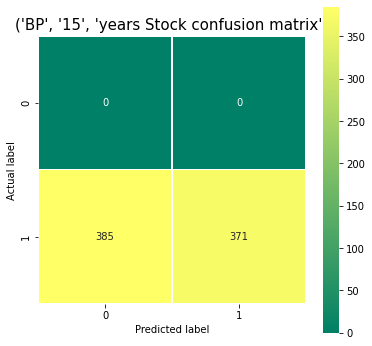

The accuracy of the model is: 50.25 %
The f1 value for the model is: 66.89 %


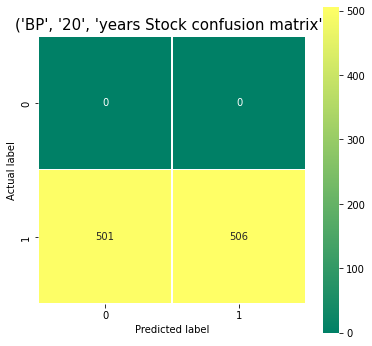

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
DIS
The accuracy of the model is: 48.41 %
The f1 value for the model is: 65.24 %


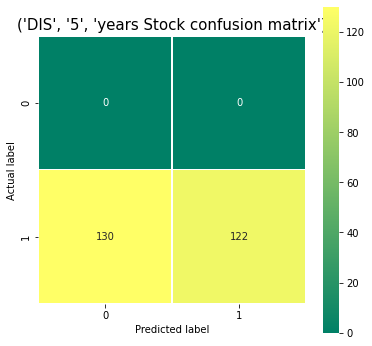

The accuracy of the model is: 51.89 %
The f1 value for the model is: 68.32 %


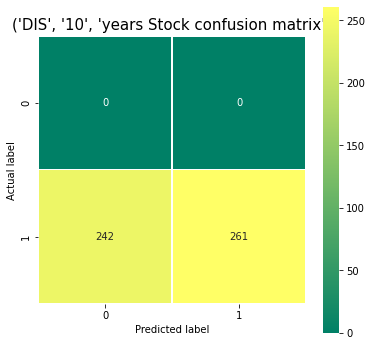

The accuracy of the model is: 50.00 %
The f1 value for the model is: 66.67 %


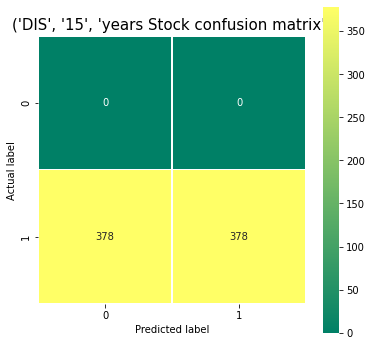

The accuracy of the model is: 51.64 %
The f1 value for the model is: 68.11 %


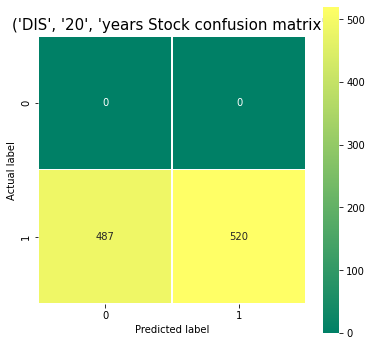

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
LMT
The accuracy of the model is: 52.78 %
The f1 value for the model is: 69.09 %


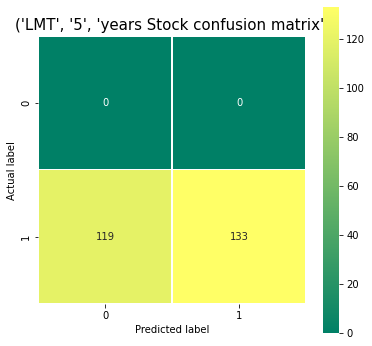

The accuracy of the model is: 55.47 %
The f1 value for the model is: 71.36 %


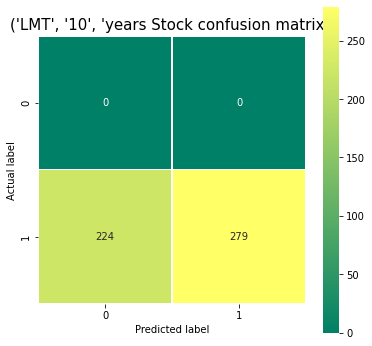

The accuracy of the model is: 51.85 %
The f1 value for the model is: 68.29 %


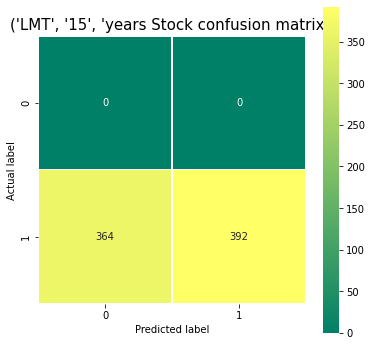

The accuracy of the model is: 51.64 %
The f1 value for the model is: 68.11 %


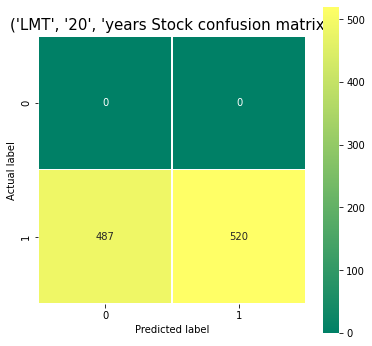

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
BTC-USD
The accuracy of the model is: 49.32 %
The f1 value for the model is: 66.06 %


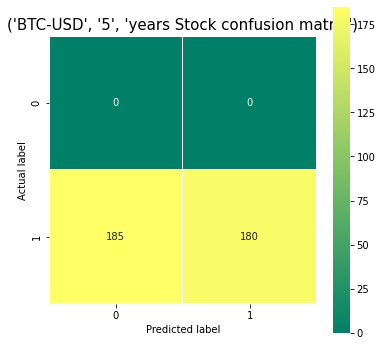

The accuracy of the model is: 52.97 %
The f1 value for the model is: 69.26 %


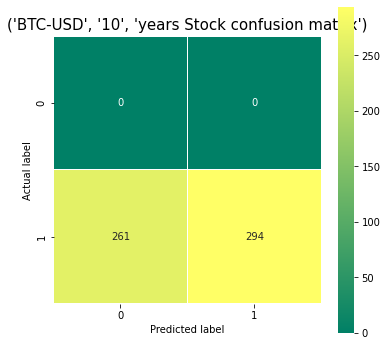

The accuracy of the model is: 56.04 %
The f1 value for the model is: 71.82 %


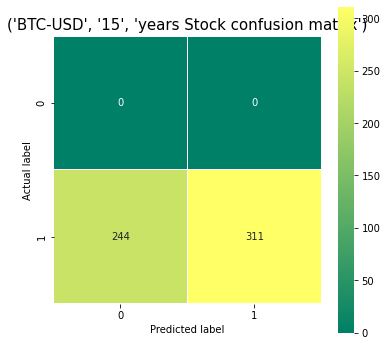

The accuracy of the model is: 53.69 %
The f1 value for the model is: 69.87 %


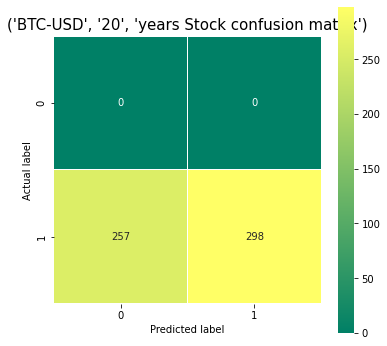

In [2]:
#5 different tickers: Microsoft, BP, Disney, Lockheed Martin, and bitcoin.
Tickers = ["MSFT","BP","DIS","LMT","BTC-USD"]
for tick in Tickers:
    stock5 = yf.download([tick],period = "5y")
    stock10 = yf.download([tick],period = "10y")
    stock15 = yf.download([tick],period = "15y")
    stock20 = yf.download([tick],period = "20y")
    years = [stock5,stock10,stock15,stock20]
    print(tick)
    yearsused = 5
    for stock in years:
       # print(stock.head())
        Open = stock["Open"]
        CHANGE = np.array([])

        for i in range(0,len(Open)-1):    
            if Open[i]<Open[i+1]:
                CHANGE = np.append(CHANGE, 1)
            else:
                CHANGE = np.append(CHANGE, 0)    
        CHANGE = np.append(CHANGE, "NaN")
        stock["Change"] = CHANGE
        stock = stock[:-1]
        
        features = ["Open","Low","High","Close"]

        ratio = round(0.8*stock.shape[0])
        X = stock[features]
        Y = stock["Change"]

        X_train, X_test, y_train, y_test = train_test_split(X,Y,train_size=ratio)
        #print(X_train.shape, y_train.shape)
        model=DummyClassifier(strategy = "constant", constant = "1.0",random_state = 42069)
        svmfit = model.fit(X_train,y_train)

        y_preds = svmfit.predict(X_test)
        print('The accuracy of the model is: {:.2f}'.format(accuracy_score(y_test, y_preds)*100),"%")
    #     print('The recall score for the dataset using SVM is',(recall_score(y_test,y_preds,pos_label="1.0")*100),'%')
    #     print('The precision percent value for the dataset using SVM is',(precision_score(y_test,y_preds,pos_label="1.0")*100),'%')
        print('The f1 value for the model is: {:.2f}'.format(f1_score(y_test,y_preds,pos_label="1.0")*100),'%')

        cm_svm = metrics.confusion_matrix(y_preds,y_test)
        plt.figure(figsize=(6,6))
        sns.heatmap(cm_svm,annot=True,fmt="d",linewidths=.5,square=True,cmap="summer")
        plt.ylabel("Actual label")
        plt.xlabel("Predicted label")
        all_sample_title=(tick, str(yearsused),"years Stock confusion matrix")
        plt.title(all_sample_title,size=15)
        plt.show()
        yearsused = yearsused + 5